In [274]:
import pandas as pd 
import os
from typing import List

def merge_func_list(file_path: str, file_name: str) -> List[pd.DataFrame]:
    """
    지정된 경로에서 특정 파일 이름이 포함된 모든 Excel 파일을 찾아서 하나의 DataFrame으로 합칩니다.
    
    Parameters:
    file_path (str): 검색할 디렉토리 경로
    file_name (str): 찾을 파일 이름의 일부
    
    Returns:
    pd.DataFrame: 합쳐진 DataFrame
    """
    df_total = []
    
    try:
        # 디렉토리 내의 모든 파일 검색
        for file in os.listdir(file_path):
            # 파일이 Excel 파일이고 지정된 이름을 포함하는지 확인
            if (file.endswith('.xlsx') or file.endswith('.xls')) and file_name.lower() in file.lower():
                # 전체 파일 경로 생성
                full_path = os.path.join(file_path, file)
                
                try:
                    # Excel 파일 읽기
                    df_xlsx = pd.read_excel(io=full_path, header=2, index_col=0)
                    
                    # DataFrame 합치기
                    # df_total = pd.concat([df_total, df_xlsx], axis=0, ignore_index=True)
                    df_total.append(df_xlsx)

                except Exception as e:
                    print(f"파일 '{file}' 읽기 중 오류 발생: {str(e)}")
                    continue
        

        return df_total
    
    except Exception as e:
        print(f"오류 발생: {str(e)}")
        return pd.DataFrame()

In [275]:
df_data_list = merge_func_list(f"../datasets/", f"_지수")
print(len(df_data_list))


4


/usr/local/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [276]:
df_data_list[2].head()

,202001월,202002월,202003월,202004월,202005월,202006월,202007월,202008월,202009월,202010월,...,202306월,202307월,202308월,202309월,202310월,202311월,202312월,202401월,202402월,202403월
소비자물가,1.2,0.9,0.8,0.0,-0.2,0.2,0.4,0.8,0.9,0.1,...,2.7,2.4,3.4,3.7,3.8,3.3,3.2,2.8,3.1,3.1
- 농축수산물,1.3,-0.7,3.3,1.0,3.6,6.1,8.8,12.3,12.8,12.5,...,0.6,0.1,3.2,4.4,8.0,7.2,7.7,8.0,11.4,11.7
- 공업제품,2.3,2.2,1.3,-0.5,-1.8,-1.2,-0.5,-0.5,-0.8,-1.1,...,0.3,0.1,2.6,3.4,3.6,2.5,2.1,1.8,2.1,2.2
- 집세,-0.1,-0.1,0.1,0.0,0.1,0.2,0.2,0.3,0.4,0.5,...,0.5,0.3,0.2,0.1,0.0,0.0,-0.1,-0.2,-0.1,0.0
- 공공서비스,-1.6,-1.6,-0.5,-1.6,-1.8,-1.8,-1.8,-1.7,-0.7,-6.0,...,0.8,1.0,1.5,1.6,2.0,2.1,1.9,2.2,2.0,2.0


In [277]:
def clean_dataframe(df: pd.DataFrame, index: str) -> pd.DataFrame:
    # '출처' 인덱스 이후의 모든 인덱스를 자르기
    if index in df.index:
        # '출처' 인덱스의 위치 찾기
        cut_index = df.index.get_loc(index)
        # 해당 인덱스 이전까지의 데이터 선택
        df = df.iloc[:cut_index]
    
    return df


In [278]:
for idx, df in enumerate(df_data_list):  
    df_data_list[idx] = clean_dataframe(df, '출처:')

df_data_list[1].head()
# df_data_list[1].info()


,20201/4,20202/4,20203/4,20204/4,20211/4,20212/4,20213/4,20214/4,20221/4,20222/4,20223/4,20224/4,20231/4,20232/4,20233/4,20234/4,20241/4,20242/4,20243/4
건설투자(국내총생산),5.5,2.2,1.1,-1.0,-0.2,0.0,-0.6,-0.2,-5.0,-4.5,-2.1,-2.6,1.7,1.7,4.3,-1.2,1.6,-0.5,-5.7
국내건설수주,-1.0,26.6,37.4,9.5,26.5,18.7,3.7,-2.9,13.4,21.4,30.2,-17.2,-12.7,-31.4,-44.8,22.7,-15.6,20.9,27.0
건축허가면적,-5.1,4.0,12.6,-2.1,7.2,29.3,12.7,20.4,14.1,13.7,5.4,-11.0,-8.5,-33.5,-32.8,-24.3,-20.6,-16.6,4.8


In [279]:
df_data_transe_list = []
for df in df_data_list:
    df_data_transe_list.append(df.transpose())

for df in df_data_transe_list:
     print(df.head())

        국내총생산(명목GDP) 경제성장률(실질GDP성장률)
20201/4    489,061.0             1.2
20202/4    502,861.3            -2.6
20203/4    524,939.5            -0.8
20204/4    541,604.8            -0.5
20211/4    515,116.3             2.5
        건설투자(국내총생산) 국내건설수주 건축허가면적
20201/4         5.5   -1.0   -5.1
20202/4         2.2   26.6    4.0
20203/4         1.1   37.4   12.6
20204/4        -1.0    9.5   -2.1
20211/4        -0.2   26.5    7.2
        소비자물가 - 농축수산물 - 공업제품  - 집세 - 공공서비스 - 개인서비스 근원물가 생활물가
202001월   1.2     1.3    2.3  -0.1    -1.6     1.7  0.7  1.7
202002월   0.9    -0.7    2.2  -0.1    -1.6     1.1  0.5  1.2
202003월   0.8     3.3    1.3   0.1    -0.5     0.5  0.5  1.4
202004월   0.0     1.0   -0.5   0.0    -1.6     1.0  0.3  0.2
202005월  -0.2     3.6   -1.8   0.1    -1.8     1.0  0.6 -0.5
        동행지수순환변동치 선행지수순환변동치
202001월     100.3      99.5
202002월      99.6      99.5
202003월      98.4      99.1
202004월      97.3      98.8
202005월      96.4      98.5


In [280]:
def compress_monthly_to_quarterly(df: pd.DataFrame) -> pd.DataFrame:
    """
    월별 데이터를 분기별 데이터로 변환합니다.
    문자열로 된 숫자를 float로 변환하고 분기별 평균을 계산합니다.
    """
    df_reset = df.reset_index()
    
    # 데이터를 숫자형으로 변환 (쉼표 제거 후 변환)
    df_reset[df.columns[0]] = pd.to_numeric(df_reset[df.columns[0]].astype(str).str.replace(',', ''), errors='coerce')
    
    # 연도와 월 추출
    df_reset['year'] = df_reset['index'].str[:4]
    df_reset['month'] = df_reset['index'].str[4:6].astype(int)
    df_reset['quarter'] = ((df_reset['month'] - 1) // 3 + 1).astype(str)
    df_reset['quarter_idx'] = df_reset['year'] + df_reset['quarter'] + '/4'
    
    # 분기별로 그룹화하여 평균 계산
    quarterly_df = df_reset.groupby('quarter_idx')[df.columns[0]].mean().to_frame()
    
    return quarterly_df

In [281]:
def is_monthly_index(df: pd.DataFrame) -> bool:
    """
    DataFrame의 인덱스가 '월'로 끝나면 True, '/4'로 끝나면 False를 반환합니다.
    
    Parameters:
    df (pd.DataFrame): 검사할 DataFrame
    
    Returns:
    bool: 인덱스가 '월'로 끝나면 True, '/4'로 끝나면 False
    """
    # 첫 번째 인덱스만 확인하면 됨 (모든 인덱스가 동일한 형식이라고 가정)
    return df.index[0].endswith('월')

In [282]:

for idx, df in enumerate(df_data_transe_list):  
    # 인덱스 접미사 확인
    if is_monthly_index(df) :
        df_data_transe_list[idx] = compress_monthly_to_quarterly(df)

In [283]:
df_data_transe_list[1].head()

,건설투자(국내총생산),국내건설수주,건축허가면적
20201/4,5.5,-1.0,-5.1
20202/4,2.2,26.6,4.0
20203/4,1.1,37.4,12.6
20204/4,-1.0,9.5,-2.1
20211/4,-0.2,26.5,7.2


In [284]:
def standardize_series(series):
    """
    시계열을 표준화 (평균=0, 표준편차=1)
    """
    return (series - series.mean()) / series.std()

In [285]:
# 지수화 
serise_data_list = []
for df in df_data_transe_list:
    # 모든 특수문자 제거 후 숫자로 변환 (숫자에 , 표시 ㄷㄷ)
    clean_series = df.iloc[:, 0].astype(str).str.replace(',', '').str.strip()
    numeric_series = pd.to_numeric(clean_series, errors='coerce')
    # 정규화 계산
    # normalized_series = (numeric_series / numeric_series.iloc[0]) * 100
    normalized_series = standardize_series(numeric_series)
    normalized_series.name = df.columns[0]
    serise_data_list.append(normalized_series)

In [286]:
def convert_yoy_to_cumulative(yoy_series):
    """
    전년 동기비(%)를 누적 증가율로 변환
    예: 첫해 100으로 시작해서 매년 증가율을 누적
    """
    # 문자열을 숫자로 변환 (쉼표가 있다면 제거)
    numeric_series = pd.to_numeric(yoy_series.astype(str).str.replace(',', ''), errors='coerce')
        
    # 퍼센트를 소수점으로 변환 (예: 5.5% -> 0.055)
    growth_rates = numeric_series / 100
    
    # 누적 곱 계산 (1 + 증가율)
    cumulative = (1 + growth_rates).cumprod() * 100

    return cumulative

In [287]:
# 1. 건설투자 전년동기비를 누적 증가율로 변환
construction_cumulative = convert_yoy_to_cumulative(df_data_transe_list[1]['건설투자(국내총생산)'])


In [288]:
# serise_data_list[1] = construction_cumulative
# serise_data_list[3] = df_data_transe_list[3]['동행지수순환변동치']

In [289]:
import matplotlib.pyplot as plt
import matplotlib as mpl # 한글 폰트 설정 (NanumGothic) 
mpl.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

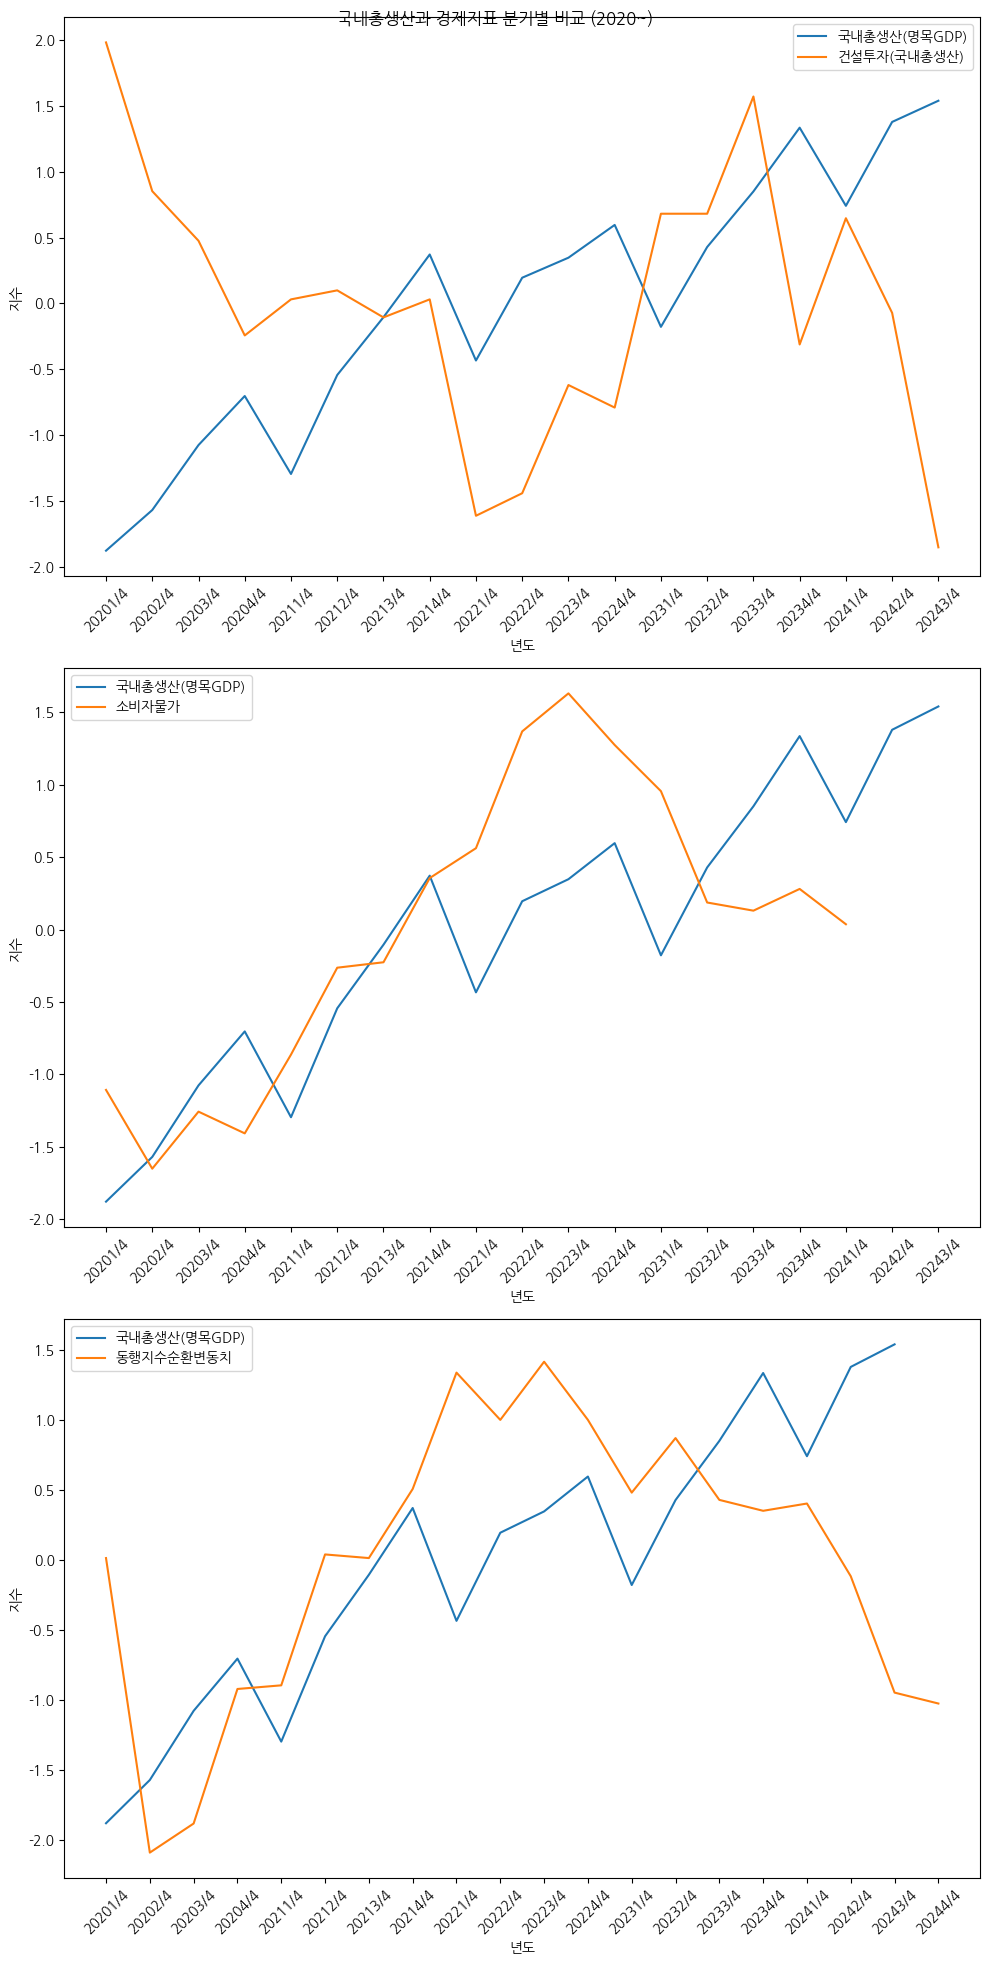

In [290]:
fig, axes = plt.subplots(len(serise_data_list)-1,1,figsize=(10,20), dpi=100) # 외곽 사이즈

fig.suptitle('국내총생산과 경제지표 분기별 비교 (2020~)')

# 그래프 그리기
for num, series in enumerate(serise_data_list[1:]):
    axes[num].plot(serise_data_list[0].index, serise_data_list[0], 
                  label=serise_data_list[0].name)
    axes[num].plot(series.index, series, 
                  label=series.name)
    axes[num].set_xlabel('년도')
    axes[num].set_ylabel('지수')
    axes[num].legend()
    axes[num].tick_params(axis='x', rotation=45)

# plt.xticks(rotation=45)
plt.tight_layout()
plt.show()